## Notebook Setup

In [4]:
#Essentials
import pandas as pd
from pandas import Series, DataFrame
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
import sqlite3
import pyodbc
import numpy as np; np.random.seed(1)

#Image creation and display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
#from image import image, display

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

from sklearn.decomposition import PCA

#Metrics of accuracy
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Fine-tuning and enseble learning
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier

#Other
import itertools as it
import io
import os
os.sys.path
import sys
import glob
import concurrent.futures
from __future__ import print_function
import binascii
import struct
from PIL import Image
import scipy
import scipy.misc
import scipy.cluster
import datetime, time
import functools, operator
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

In [5]:
df = pd.read_csv('csv-files/preprocessed_data.csv')

In [6]:
#URL: https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-pandas-columns-in-python
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

calculate_vif_(df)

dropping 'Director_ID' at index: 14
dropping 'Avg_Rec' at index: 21
dropping 'Manager_ID' at index: 10
dropping 'Delivered_on_Time' at index: 18
dropping 'Office' at index: 1
dropping 'Avg_Profit' at index: 18
dropping 'Rec_Class' at index: 18
dropping 'Director_Team' at index: 12
dropping 'Total_Num_Stages' at index: 4
dropping 'Director_Empl_Months' at index: 12
dropping 'Profit_Class' at index: 15
Remaining variables:
Index(['Country', 'Sector', 'Project_Size_Sort_Order',
       'Project_Duration_Weeks', 'Is_Multi_Discipline_Project',
       'Is_First_Client_Project', 'Default_Rate_Group',
       'Perc_of_Stages_with_Fixed_Fee', 'Manager_Team', 'Manager_Is_Recent',
       'Manager_Empl_Months', 'Director_Is_Recent', 'Perc_of_Subcontractors',
       'Is_Front_Loaded', 'Total_Data_Issues'],
      dtype='object')


,Country,Sector,Project_Size_Sort_Order,Project_Duration_Weeks,Is_Multi_Discipline_Project,Is_First_Client_Project,Default_Rate_Group,Perc_of_Stages_with_Fixed_Fee,Manager_Team,Manager_Is_Recent,Manager_Empl_Months,Director_Is_Recent,Perc_of_Subcontractors,Is_Front_Loaded,Total_Data_Issues
0,0,6,4.0,4.0,0,1,1,0.80,7,0,125.0,0,0.0,1,2.0
1,0,0,1.0,238.0,0,1,1,0.00,4,0,317.0,0,0.0,0,2.0
2,0,0,1.0,0.0,0,1,1,0.00,4,0,317.0,0,0.0,0,0.0
3,0,1,3.0,121.0,0,1,1,0.25,4,0,317.0,0,0.0,0,1.0
4,0,0,7.0,2.0,0,1,1,0.00,4,0,419.0,0,0.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9626,0,9,3.0,18.0,0,0,0,1.00,5,0,176.0,0,0.0,0,1.0
9627,0,0,1.0,1.0,0,0,0,0.67,15,0,11.0,0,0.0,0,1.0
9628,0,0,1.0,1.0,0,0,0,0.50,16,0,28.0,1,0.0,0,1.0
9629,0,3,1.0,3.0,0,0,0,1.00,9,0,168.0,0,0.0,0,0.0


## Part 7: <a class="anchor" id="part7"></a> Dimensionality reduction

### 7.0 <a class="anchor" id="7_0"></a> Data splitting

In [7]:
# Choose dependent variables
Y = df[['Rec_Class']].to_numpy()

# Drop the dependent variables from the feature data set
X = df[['Country', 'Sector', 'Project_Size_Sort_Order',
       'Project_Duration_Weeks', 'Is_Multi_Discipline_Project',
       'Is_First_Client_Project', 'Default_Rate_Group',
       'Perc_of_Stages_with_Fixed_Fee', 'Manager_Team', 'Manager_Is_Recent',
       'Manager_Empl_Months', 'Director_Is_Recent', 'Perc_of_Subcontractors',
       'Is_Front_Loaded', 'Total_Data_Issues']]
X = X.to_numpy()

# Split data set into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, stratify = Y)

### 7.1 <a class="anchor" id="7_1"></a> Feature selection

### 7.2 <a class="anchor" id="7_2"></a> Feature extraction

### 7.3 <a class="anchor" id="7_3"></a> Locally Linear Embedding

In [8]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=1)

In [9]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=1)
X_reduced = lle.fit_transform(X)

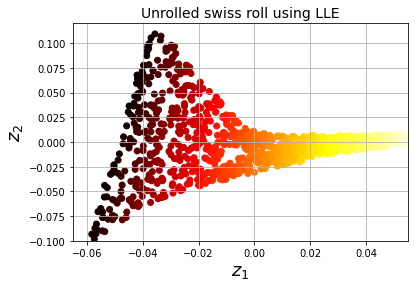

In [10]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

### 7.4 <a class="anchor" id="7_4"></a> Reduced-rank LDA

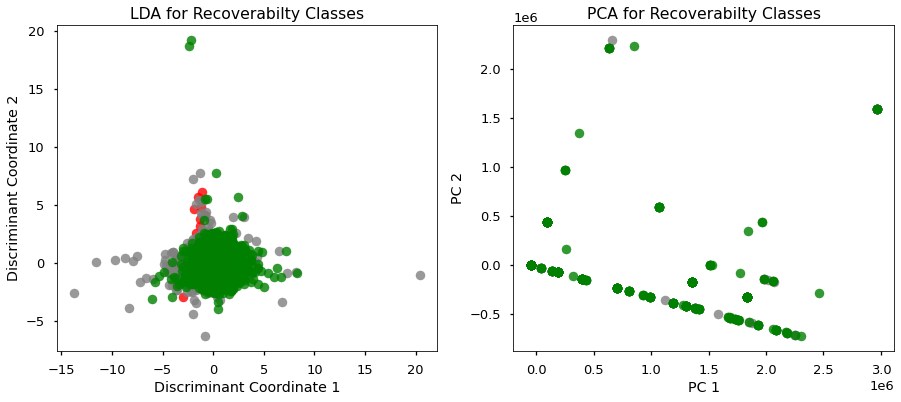

In [11]:
# Choose variables
Y = df[['Rec_Class']].to_numpy()
Y = Y[:,0]
X = df.drop(columns = ['Avg_Profit', 'Avg_Rec', 'Rec_Class', 'Profit_Class'])
X = X.to_numpy()

target_names = np.array(['unprofitable', 'average', 'highly profitable'])

X_r_lda = LinearDiscriminantAnalysis(n_components=2).fit(X, Y).transform(X)
X_r_pca = PCA(n_components=2).fit(X).transform(X)

with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['red', 'grey', 'green']
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        axes[0].scatter(X_r_lda[Y == i, 0], X_r_lda[Y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[Y == i, 0], X_r_pca[Y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].title.set_text('LDA for Recoverabilty Classes')
    axes[1].title.set_text('PCA for Recoverabilty Classes')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')

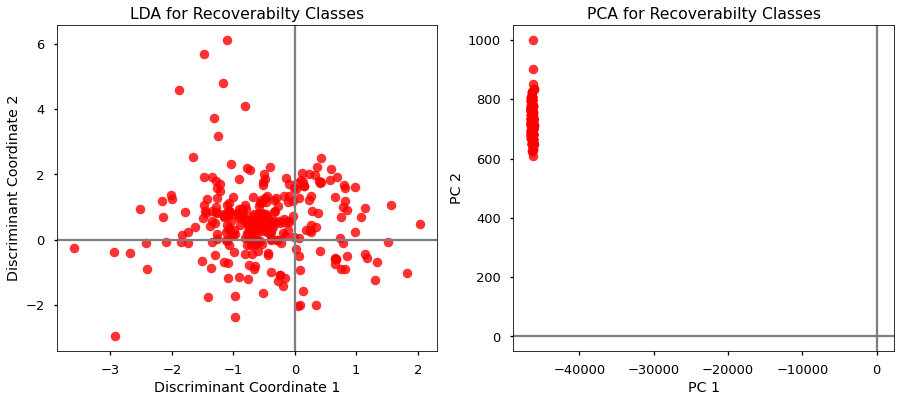

In [12]:
# Low
with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['red']
    for color, i, target_name in zip(colors, [0], target_names):
        axes[0].scatter(X_r_lda[Y == i, 0], X_r_lda[Y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[Y == i, 0], X_r_pca[Y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].title.set_text('LDA for Recoverabilty Classes')
    axes[1].title.set_text('PCA for Recoverabilty Classes')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')
    axes[0].axhline(y=0, c='grey', label='y=0')
    axes[0].axvline(x=0, c='grey', label='x=0')
    axes[1].axhline(y=0, c='grey', label='y=0')
    axes[1].axvline(x=0, c='grey', label='x=0')

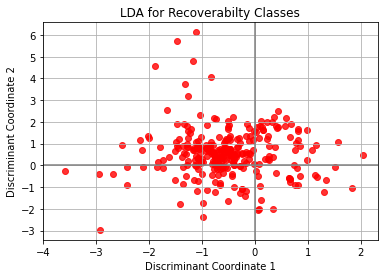

In [13]:
x_axis = X_r_lda[Y == 0, 0]
y_axis = X_r_lda[Y == 0, 1]
plt.scatter(x_axis, y_axis, alpha=.8, label='unprofitable', color='red')
plt.xticks(np.arange(round(min(x_axis)), round(max(x_axis)+1), 1))
plt.yticks(np.arange(round(min(y_axis)), round(max(y_axis)+1), 1))
plt.title('LDA for Recoverabilty Classes')
plt.xlabel('Discriminant Coordinate 1')
plt.ylabel('Discriminant Coordinate 2')
plt.axhline(y=0, c='grey', label='y=0')
plt.axvline(x=0, c='grey', label='x=0')
plt.grid()

In [14]:
#URL: https://stackoverflow.com/questions/40566413/matplotlib-pyplot-auto-adjust-unit-of-y-axis

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    print(val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])
    return y


def x_fmt(x, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if x == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(x) >=d:
            val = x/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    print(val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])
    return x

-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.

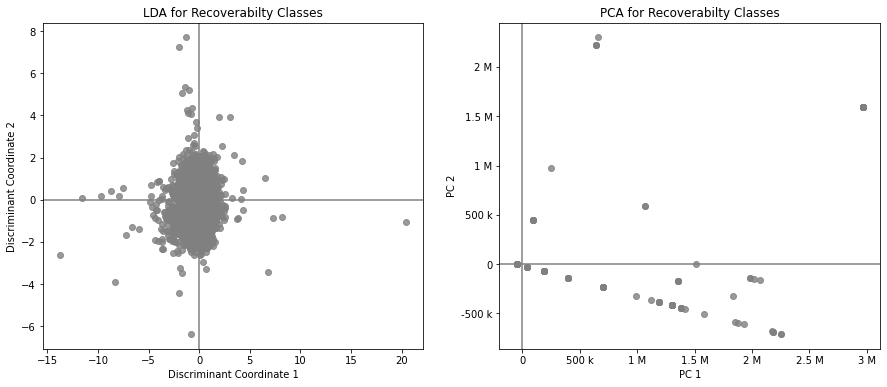

In [15]:
# Average
fig, axes = plt.subplots(1,2,figsize=[15,6])
colors = ['grey']
for color, i, target_name in zip(colors, [1], target_names):
    axes[0].scatter(X_r_lda[Y == i, 0], X_r_lda[Y == i, 1], alpha=.8, label=target_name, color=color)
    axes[1].scatter(X_r_pca[Y == i, 0], X_r_pca[Y == i, 1], alpha=.8, label=target_name, color=color)
    axes[1].yaxis.set_major_formatter(FuncFormatter(y_fmt))
    axes[1].xaxis.set_major_formatter(FuncFormatter(x_fmt))
axes[0].title.set_text('LDA for Recoverabilty Classes')
axes[1].title.set_text('PCA for Recoverabilty Classes')
axes[0].set_xlabel('Discriminant Coordinate 1')
axes[0].set_ylabel('Discriminant Coordinate 2')
axes[1].set_xlabel('PC 1')
axes[1].set_ylabel('PC 2')
axes[0].axhline(y=0, c='grey', label='y=0')
axes[0].axvline(x=0, c='grey', label='x=0')
axes[1].axhline(y=0, c='grey', label='y=0')
axes[1].axvline(x=0, c='grey', label='x=0')

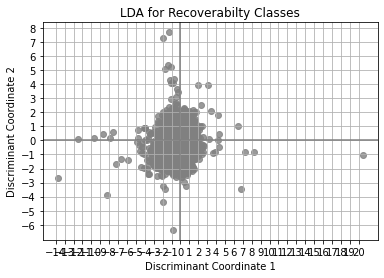

In [16]:
x_axis = X_r_lda[Y == 1, 0]
y_axis = X_r_lda[Y == 1, 1]
plt.scatter(x_axis, y_axis, alpha=.8, label='average', color='grey')
plt.xticks(np.arange(round(min(x_axis)), round(max(x_axis)+1), 1))
plt.yticks(np.arange(round(min(y_axis)), round(max(y_axis)+1), 1))
plt.title('LDA for Recoverabilty Classes')
plt.xlabel('Discriminant Coordinate 1')
plt.ylabel('Discriminant Coordinate 2')
plt.axhline(y=0, c='grey', label='y=0')
plt.axvline(x=0, c='grey', label='x=0')
plt.grid()

-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.0 1
2.5 1
-1.0 1
-500.0 1
500.0 1
1.0 1
1.5 1
2.

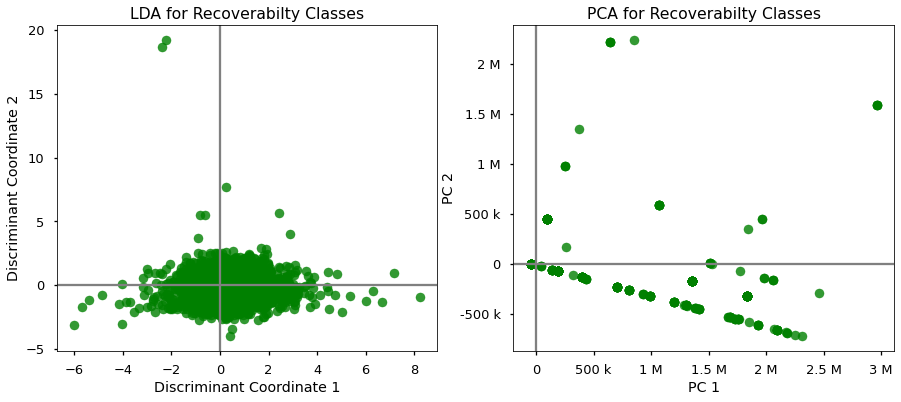

In [17]:
# High
with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['green']
    for color, i, target_name in zip(colors, [2], target_names):
        axes[0].scatter(X_r_lda[Y == i, 0], X_r_lda[Y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[Y == i, 0], X_r_pca[Y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].yaxis.set_major_formatter(FuncFormatter(y_fmt))
        axes[1].xaxis.set_major_formatter(FuncFormatter(x_fmt))
    axes[0].title.set_text('LDA for Recoverabilty Classes')
    axes[1].title.set_text('PCA for Recoverabilty Classes')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')
    axes[0].axhline(y=0, c='grey', label='y=0')
    axes[0].axvline(x=0, c='grey', label='x=0')
    axes[1].axhline(y=0, c='grey', label='y=0')
    axes[1].axvline(x=0, c='grey', label='x=0')

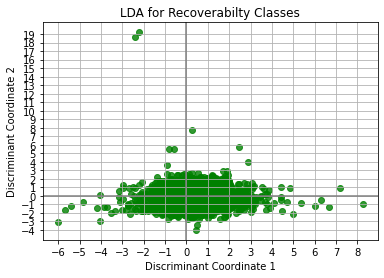

In [18]:
x_axis = X_r_lda[Y == 2, 0]
y_axis = X_r_lda[Y == 2, 1]
plt.scatter(x_axis, y_axis, alpha=.8, label='highly profitable', color='green')
plt.xticks(np.arange(round(min(x_axis)), round(max(x_axis)+1), 1))
plt.yticks(np.arange(round(min(y_axis)), round(max(y_axis)+1), 1))
plt.title('LDA for Recoverabilty Classes')
plt.xlabel('Discriminant Coordinate 1')
plt.ylabel('Discriminant Coordinate 2')
plt.axhline(y=0, c='grey', label='y=0')
plt.axvline(x=0, c='grey', label='x=0')
plt.grid()